In [5]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import rasterio
import shapely
import os

from shapely.geometry import shape
from shapely.geometry import Point

import pystac_client
import planetary_computer as pc

import random
random.seed(10)

In [6]:
# accesing Azure storage using pystac client
URL = "https://planetarycomputer.microsoft.com/api/stac/v1"
catalog = pystac_client.Client.open(URL)

#campus point naip scene
itemid = 'ca_m_3411934_sw_11_060_20180722_20190209'
search = catalog.search(
    collections=["naip"],
    ids = itemid
)
item = list(search.get_items())[0]
# sign and open item
href = pc.sign(item.assets["image"].href)
ds = rasterio.open(href)


In [7]:
aoi = 'campus_lagoon'
year = 2020

In [8]:
# root for all polygons collected on naip scenes
root = '/home/jovyan/msai4earth-esa/iceplant_detection/data_sampling_workflow/polygons_from_naip_images'
fp = os.path.join(root, 
                  aoi+'_polygons', 
                  aoi+'_polygons_'+str(year), 
                  aoi+'_polygons_'+str(year)+'.shp')

In [9]:
polys = gpd.read_file(fp)
polys.head()

#polys['iceplant'] = polys.id.apply(lambda x : 1 if x<10 else 0) 
polys.drop('id',axis=1,inplace=True)
polys.to_crs(ds.crs,inplace=True)
polys

,iceplant,year,month,day,naip_id,geometry
0,1,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238506.015 3810788.945, 238519.138 3..."
1,1,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238445.462 3810798.589, 238449.099 3..."
2,1,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238511.707 3810826.099, 238509.810 3..."
3,1,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238550.758 3810756.377, 238558.663 3..."
4,1,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238330.838 3810856.928, 238345.858 3..."
5,1,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238299.218 3810875.426, 238303.644 3..."
6,1,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238493.525 3810816.297, 238490.679 3..."
7,1,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238931.549 3811670.795, 238933.130 3..."
8,1,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238952.103 3811689.451, 238951.154 3..."
9,1,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((239092.972 3811796.960, 239080.956 3..."


In [10]:
polys['area'] = polys.geometry.apply(lambda p : p.area)
polys.sort_values(by='area',ascending=False,inplace=True)
polys.reset_index(drop=True,inplace=True)
polys.head()

,iceplant,year,month,day,naip_id,geometry,area
0,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((240470.227 3812215.680, 240734.465 3...",32834.426812
1,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((237347.048 3812360.111, 237635.427 3...",29213.098181
2,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((239897.566 3812821.365, 240018.310 3...",16229.266524
3,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((240786.087 3812381.047, 240992.578 3...",14870.422097
4,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238782.934 3812137.904, 238850.601 3...",10775.545137


<AxesSubplot:>

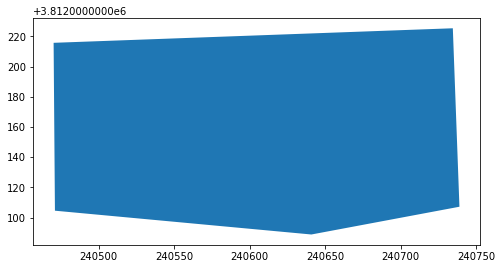

In [11]:
# pick biggest polygon
biggest = polys.filter(items=[0],axis=0).reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches((8,8))
biggest.plot(ax=ax)

### Figuring out #pixels covered by polygon
Checking the CRS of the polygon we can see that the axes are in meters, so the areas we get from the shapely function `polygon.area` is in meters too. 

Using the resolution for the raster we can know how much area a single pixel covers. 

In [9]:
print('NAIP resolution:',ds.res,'\n')
biggest.crs

NAIP resolution: (0.6, 0.6) 



<Derived Projected CRS: EPSG:26911>
Name: NAD83 / UTM zone 11N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
def random_pts_poly(number, polygon):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  

In [13]:
proportion = 0.2
# calculating how many pixels are there in the polygon (approx), by dividing the area of poly by area of a single pixel
pixels_in_poly = int(biggest.area/(ds.res[0]*ds.res[1])) 
N = int(pixels_in_poly * proportion)
print('pixels_in_poly: ',pixels_in_poly)
print('N: ', N)

pixels_in_poly:  91206
N:  18241


In [14]:
type(biggest.geometry[0])

shapely.geometry.polygon.Polygon

In [15]:
N=10
points = random_pts_poly(N,biggest.geometry[0])

In [18]:
type(points[0])

shapely.geometry.point.Point

<AxesSubplot:>

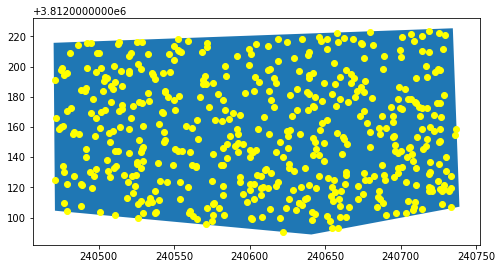

In [38]:
geo_points = gpd.GeoDataFrame()
geo_points['geometry']=points
geo_points.set_crs(polys.crs,inplace=True)
# *******************************************************************

fig, ax = plt.subplots()
fig.set_size_inches((8,8))
biggest.plot(ax=ax)
geo_points.plot(ax=ax,color='yellow')

In [39]:
geo_points.shape

(500, 1)

In [40]:
big_area = biggest['geometry'][0].area
polys['num_random_pts'] = polys.area.apply(lambda a : int(a/big_area*N))
polys

,iceplant,year,month,day,naip_id,geometry,num_random_pts
0,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((240470.227 3812215.680, 240734.465 3...",500
1,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((237347.048 3812360.111, 237635.427 3...",444
2,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((239897.566 3812821.365, 240018.310 3...",247
3,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((240786.087 3812381.047, 240992.578 3...",226
4,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238782.934 3812137.904, 238850.601 3...",164
5,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((236801.914 3814119.220, 237012.822 3...",152
6,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((236439.540 3811988.809, 236522.386 3...",108
7,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((237835.267 3811212.773, 237894.713 3...",77
8,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((238640.324 3811202.024, 238700.403 3...",61
9,0,2020,5,21,ca_m_3411934_sw_11_060_20200521,"POLYGON ((236731.714 3812922.791, 236789.264 3...",50


In [47]:
samples = []
for i in range(0,polys.shape[0]):
    poly = polys['geometry'][i]
    N = polys['num_random_pts'][i]
    
    points = random_pts_poly(N,poly)
    sample = pd.DataFrame({
        'geometry': pd.Series(points), 
        'iceplant':pd.Series(np.full(N,polys['iceplant'][i])),
        'polygon':pd.Series(np.full(N,i))
                 })
    sample['xy']=sample.geometry.apply(lambda p :(p.x, p.y))
    
    data_generator = ds.sample(sample.xy)
    data = []
    for i in data_generator:
        data.append(i)
    data = np.vstack(data)
    data = pd.DataFrame(data, columns=['r','g','b','nifr'])
    
    sample = pd.concat([sample,data],axis=1)
    samples.append(sample)
    
train_set = pd.concat(samples)

/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interfac

In [52]:
train_set.polygon.value_counts()

0     500
1     444
2     247
3     226
4     164
5     152
6     108
7      77
8      61
9      50
10     45
11     36
12     35
13     33
14     30
15     26
16     23
17     15
18     10
19      5
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      1
28      1
Name: polygon, dtype: int64

In [48]:
# add columns with coordinates
train_set['x']= train_set.geometry.apply(lambda p : p.x)
train_set['y']= train_set.geometry.apply(lambda p : p.y)
train_set.drop('xy',axis=1,inplace=True)
train_set.reset_index(drop=True,inplace=True)
train_set

,geometry,iceplant,polygon,r,g,b,nifr,x,y
0,POINT (240665.02406432483 3812147.3951811753),0,0,127,118,111,154,240665.024064,3.812147e+06
1,POINT (240704.54459297104 3812142.0673941635),0,0,87,99,92,172,240704.544593,3.812142e+06
2,POINT (240496.10263829748 3812176.3115977948),0,0,91,104,94,167,240496.102638,3.812176e+06
3,POINT (240586.5672207975 3812197.1363742608),0,0,93,109,96,182,240586.567221,3.812197e+06
4,POINT (240540.1903746211 3812112.7090876666),0,0,131,133,107,173,240540.190375,3.812113e+06
...,...,...,...,...,...,...,...,...,...
2298,POINT (238925.14652102612 3811660.922330218),1,25,117,112,111,131,238925.146521,3.811661e+06
2299,POINT (238477.2232802618 3810814.208907071),1,26,68,83,81,175,238477.223280,3.810814e+06
2300,POINT (238485.42524083584 3810816.5211114087),1,26,82,78,84,159,238485.425241,3.810817e+06
2301,POINT (238945.77802412855 3811675.90429072),1,27,86,91,99,101,238945.778024,3.811676e+06


In [31]:
train_set = train_set[['geometry','x','y','r','g','b','nifr','iceplant']]
train_set

,geometry,x,y,r,g,b,nifr,iceplant
0,POINT (238502.90962098842 3810767.0101709925),238502.909621,3.810767e+06,87,80,87,140,1
1,POINT (238531.08502453016 3810765.502552128),238531.085025,3.810766e+06,85,81,84,149,1
2,POINT (238514.12151877338 3810770.2447426612),238514.121519,3.810770e+06,96,83,89,149,1
3,POINT (238494.7719131412 3810776.858465532),238494.771913,3.810777e+06,93,89,86,161,1
4,POINT (238504.7700446698 3810767.611043045),238504.770045,3.810768e+06,84,78,85,135,1
...,...,...,...,...,...,...,...,...
4784,POINT (238528.64940991733 3810823.989051403),238528.649410,3.810824e+06,87,83,83,159,1
4785,POINT (238523.83379692418 3810824.088622455),238523.833797,3.810824e+06,86,84,84,164,1
4786,POINT (238526.3225788108 3810826.9657032588),238526.322579,3.810827e+06,84,82,85,147,1
4787,POINT (238528.57192852139 3810829.298083701),238528.571929,3.810829e+06,92,81,85,151,1
